<a href="https://colab.research.google.com/github/KrithikChidM/LGMVIP--DataScience/blob/main/SrockMarketPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Process Path:

1.   Normalization of Data
2.   Splitting the Dataset into Train and Test Sets
1.   Reshaping the Input
2.   Creating the LSTM Model
1.   Transforming back into original form
2.   Plotting using Shift Train Prediction
2.   Predicting the Stock Price of the next 30 days







In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
train_dataset = pd.read_csv(url)
training_set = train_dataset.iloc[:,1:2].values
train_dataset.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [3]:
close_data = train_dataset['Close']
close_data

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

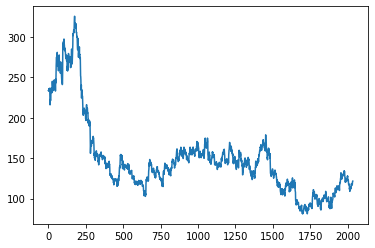

In [4]:
plt.plot(close_data)

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
close_data = scaler.fit_transform(np.array(close_data).reshape(-1,1))
close_data.shape

(2035, 1)

In [6]:
print(close_data)

[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.1621732 ]
 [0.16319444]
 [0.16584967]]


In [7]:
train_size = int(len(close_data)*0.75)
test_size = len(close_data) - train_size
train_data,test_data = close_data[0:train_size,:],close_data[train_size:len(close_data),:1]

In [8]:
def create_dataset(dataset,time_step = 1):
    dataX,dataY = [],[]
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX), np.array(dataY)

In [9]:
time_step = 100
x_train, y_train = create_dataset(train_data,time_step)
x_test, y_test = create_dataset(test_data,time_step)

In [10]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [11]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
23/23 [==============================] - 11s 240ms/step - loss: 0.0157 - val_loss: 0.0026
Epoch 2/100
23/23 [==============================] - 4s 180ms/step - loss: 0.0021 - val_loss: 8.5675e-04
Epoch 3/100
23/23 [==============================] - 4s 184ms/step - loss: 0.0015 - val_loss: 8.9753e-04
Epoch 4/100
23/23 [==============================] - 4s 184ms/step - loss: 0.0015 - val_loss: 8.7115e-04
Epoch 5/100
23/23 [==============================] - 4s 184ms/step - loss: 0.0013 - val_loss: 7.8368e-04
Epoch 6/100
23/23 [==============================] - 4s 184ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 7/100
23/23 [==============================] - 4s 183ms/step - loss: 0.0012 - val_loss: 8.5295e-04
Epoch 8/100
23/23 [==============================] - 4s 181ms/step - loss: 0.0012 - val_loss: 7.8886e-04
Epoch 9/100
23/23 [==============================] - 4s 182ms/step - loss: 0.0013 - val_loss: 9.1314e-04
Epoch 10/100
23/23 [==============================] - 4s 182ms

In [13]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [14]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [15]:
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

164.73304919790408

In [16]:
165.87076791352783
math.sqrt(mean_squared_error(y_test, test_predict))

106.43983896203318

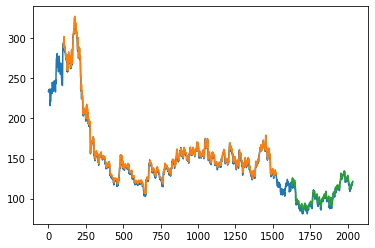

In [17]:
look_back = 100
trainPredictPlot = np.empty_like(close_data)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict
testPredictPlot = np.empty_like(close_data)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back*2)+1:len(close_data)-1 ,:] = test_predict
plt.plot(scaler.inverse_transform(close_data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [18]:
len(test_data),x_test.shape

(509, (408, 100, 1))

In [19]:
x_input = test_data[409:].reshape(1,-1)
x_input.shape

(1, 100)

In [20]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [27]:
list_out = []
n_steps = 100
days = 30
i = 0
while(i<days):
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_steps,1))
        yhat = model.predict(x_input,verbose=0)
        print("{} day input {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        list_out.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1,n_steps,1))
        yhat = model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        list_out.extend(yhat.tolist())
        i=i+1

0 day input [0.17034314 0.16830065 0.17279412 0.17544935 0.18382353 0.19138072
 0.18913399 0.19097222 0.17238562 0.16830065 0.1693219  0.17177288
 0.16156046 0.14971405 0.1503268  0.15196078 0.14726307 0.14501634
 0.14603758 0.12479575 0.13112745 0.11397059 0.1190768  0.12377451
 0.13562092 0.12908497 0.13459967 0.12806373 0.13031046 0.12724673
 0.13521242 0.14522059 0.15257353 0.14848856 0.14338235 0.14562908
 0.15236928 0.15400327 0.14971405 0.1621732  0.16319444 0.16584967
 0.17055576 0.17414144 0.17772354 0.18122885 0.18463549 0.18794926
 0.19118315 0.19435011 0.19746119 0.20052478 0.20354691 0.20653139
 0.20948058 0.21239571 0.21527766 0.21812706 0.22094476 0.2237318
 0.22648937 0.229219   0.23192236 0.23460099 0.23725668 0.23989093
 0.24250503 0.24510053 0.24767841 0.25023967 0.25278524 0.2553159
 0.25783244 0.26033553 0.26282564 0.26530349 0.26776955 0.27022436
 0.27266848 0.27510238 0.2775265  0.27994132 0.28234744 0.28474525
 0.28713518 0.28951779 0.29189357 0.29426289 0.29662

In [28]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)
df3 = close_data.tolist()
df3.extend(list_out)
len(close_data)

2035

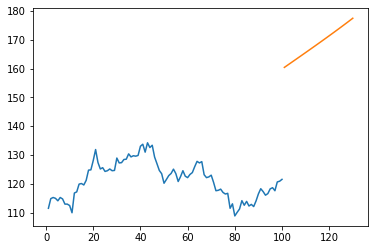

In [29]:
plt.plot(day_new,scaler.inverse_transform(close_data[1935:]))
plt.plot(day_pred,scaler.inverse_transform(list_out))